<h1 align= "center"> Classification Project </h1>
<p align= "center">Hussein Jaber & Carlita Khawand </p>
<h2> I- Import and split the data </h2>

In [ ]:
!rm -rf data && mkdir data && wget http://info.iut-bm.univ-fcomte.fr/staff/couturie/img_align_celeba_small.zip  && unzip img_align_celeba_small.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/img_align_celeba_small/img_align_celeba_small/011768.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/020486.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/055499.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/016793.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/055743.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/010877.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/013556.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/048855.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/051089.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/009549.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/050166.jpg  
  inflating: data/img_align_celeba_small/img_align_celeba_small/039861.jpg  
  inflating: data/img_ali

In [ ]:
import shutil
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pathlib
import keras
import time
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Rescaling, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [ ]:
data = pd.read_csv("/content/data/img_align_celeba_small/list_attr_celeba_small.csv")
print(data.head())

     image_id  Attractive  Heavy_Makeup  ...  Smiling  Young  Eval
0  000001.jpg           1             1  ...        1      1     0
1  000002.jpg          -1            -1  ...        1      1     0
2  000003.jpg          -1            -1  ...       -1      1     0
3  000004.jpg           1            -1  ...       -1      1     0
4  000005.jpg           1             1  ...       -1      1     0

[5 rows x 8 columns]


In [ ]:
!mkdir "data/train"
!mkdir "data/train/men"
!mkdir "data/train/women"
!mkdir "data/test"
!mkdir "data/test/men"
!mkdir "data/test/women"

In [ ]:
male_train_data = data[(data['Eval'] == 0) & (data["Male"] == 1)]
print(male_train_data)
male_train_images = male_train_data["image_id"]

path_to_your_files="data/img_align_celeba_small/img_align_celeba_small/"
copy_to_path="data/train/men"

for curr_file in male_train_images:
    shutil.copyfile(os.path.join(path_to_your_files, curr_file),
                    os.path.join(copy_to_path, curr_file)) 

         image_id  Attractive  Heavy_Makeup  ...  Smiling  Young  Eval
2      000003.jpg          -1            -1  ...       -1      1     0
6      000007.jpg           1            -1  ...       -1      1     0
7      000008.jpg          -1            -1  ...       -1      1     0
11     000012.jpg           1            -1  ...        1      1     0
12     000013.jpg          -1            -1  ...        1      1     0
...           ...         ...           ...  ...      ...    ...   ...
49990  049991.jpg          -1            -1  ...        1     -1     0
49991  049992.jpg          -1            -1  ...        1      1     0
49992  049993.jpg          -1            -1  ...       -1     -1     0
49993  049994.jpg          -1            -1  ...       -1      1     0
49997  049998.jpg          -1            -1  ...       -1      1     0

[20945 rows x 8 columns]


In [ ]:
female_train_data = data[(data['Eval'] == 0) & (data["Male"] == -1)]
print(female_train_data)
female_train_images = female_train_data["image_id"]

path_to_your_files="data/img_align_celeba_small/img_align_celeba_small/"
copy_to_path="data/train/women"

for curr_file in female_train_images:
    shutil.copyfile(os.path.join(path_to_your_files, curr_file),
                    os.path.join(copy_to_path, curr_file)) 

         image_id  Attractive  Heavy_Makeup  ...  Smiling  Young  Eval
0      000001.jpg           1             1  ...        1      1     0
1      000002.jpg          -1            -1  ...        1      1     0
3      000004.jpg           1            -1  ...       -1      1     0
4      000005.jpg           1             1  ...       -1      1     0
5      000006.jpg           1             1  ...       -1      1     0
...           ...         ...           ...  ...      ...    ...   ...
49987  049988.jpg          -1             1  ...       -1      1     0
49994  049995.jpg           1             1  ...        1      1     0
49995  049996.jpg          -1            -1  ...        1      1     0
49996  049997.jpg           1             1  ...        1      1     0
49998  049999.jpg           1            -1  ...        1      1     0

[29054 rows x 8 columns]


In [ ]:
male_test_data = data[(data['Eval'] == 1) & (data["Male"] == 1)]
print(male_test_data)
male_test_images = male_test_data["image_id"]

path_to_your_files="data/img_align_celeba_small/img_align_celeba_small/"
copy_to_path="data/test/men"

for curr_file in male_test_images:
    shutil.copyfile(os.path.join(path_to_your_files, curr_file),
                    os.path.join(copy_to_path, curr_file)) 

         image_id  Attractive  Heavy_Makeup  ...  Smiling  Young  Eval
50001  050002.jpg          -1            -1  ...       -1      1     1
50003  050004.jpg          -1            -1  ...        1      1     1
50011  050012.jpg          -1            -1  ...        1     -1     1
50013  050014.jpg           1            -1  ...       -1      1     1
50014  050015.jpg          -1            -1  ...       -1     -1     1
...           ...         ...           ...  ...      ...    ...   ...
59988  059989.jpg           1            -1  ...        1      1     1
59989  059990.jpg          -1            -1  ...        1     -1     1
59993  059994.jpg          -1             1  ...       -1      1     1
59997  059998.jpg          -1            -1  ...        1     -1     1
59998  059999.jpg          -1            -1  ...       -1     -1     1

[4200 rows x 8 columns]


In [ ]:
female_test_data = data[(data['Eval'] == 1) & (data["Male"] == -1)]
print(female_test_data)
female_test_images = female_test_data["image_id"]

path_to_your_files="data/img_align_celeba_small/img_align_celeba_small/"
copy_to_path="data/test/women"

for curr_file in female_test_images:
    shutil.copyfile(os.path.join(path_to_your_files, curr_file),
                    os.path.join(copy_to_path, curr_file)) 

         image_id  Attractive  Heavy_Makeup  ...  Smiling  Young  Eval
49999  050000.jpg           1             1  ...       -1      1     1
50000  050001.jpg           1             1  ...        1      1     1
50002  050003.jpg          -1            -1  ...        1     -1     1
50004  050005.jpg           1             1  ...       -1      1     1
50005  050006.jpg           1             1  ...        1      1     1
...           ...         ...           ...  ...      ...    ...   ...
59992  059993.jpg           1             1  ...        1      1     1
59994  059995.jpg           1             1  ...       -1      1     1
59995  059996.jpg           1             1  ...       -1      1     1
59996  059997.jpg           1             1  ...        1      1     1
59999  060000.jpg           1             1  ...        1      1     1

[5801 rows x 8 columns]


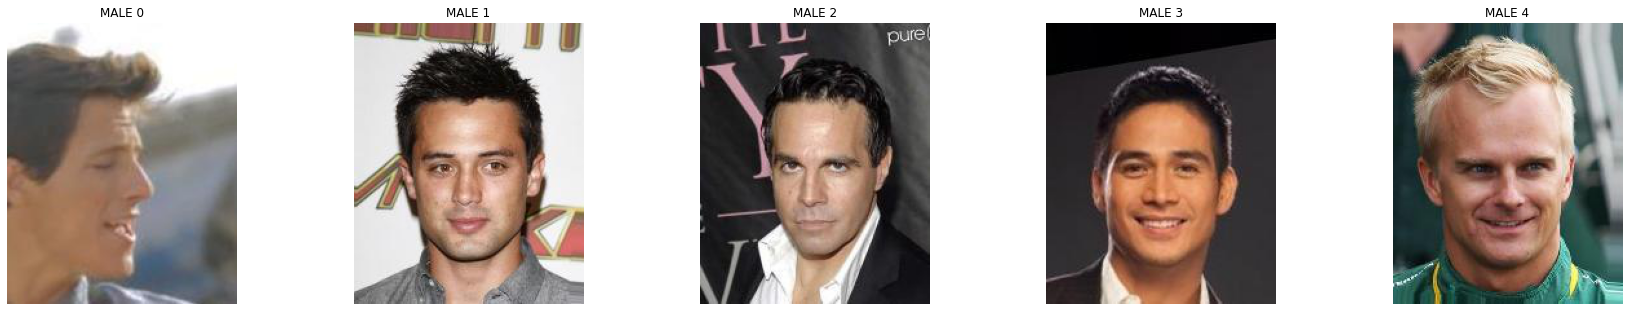

In [ ]:
count = 0
plt.figure(figsize=(30,30))
for image in male_train_images:
    ax=plt.subplot(5,5,count+1)
    plt.imshow(mpimg.imread('data/train/men/' + image))
    plt.title("MALE " + str(count))
    plt.axis('off')
    count = count + 1
    if count == 5:
      break

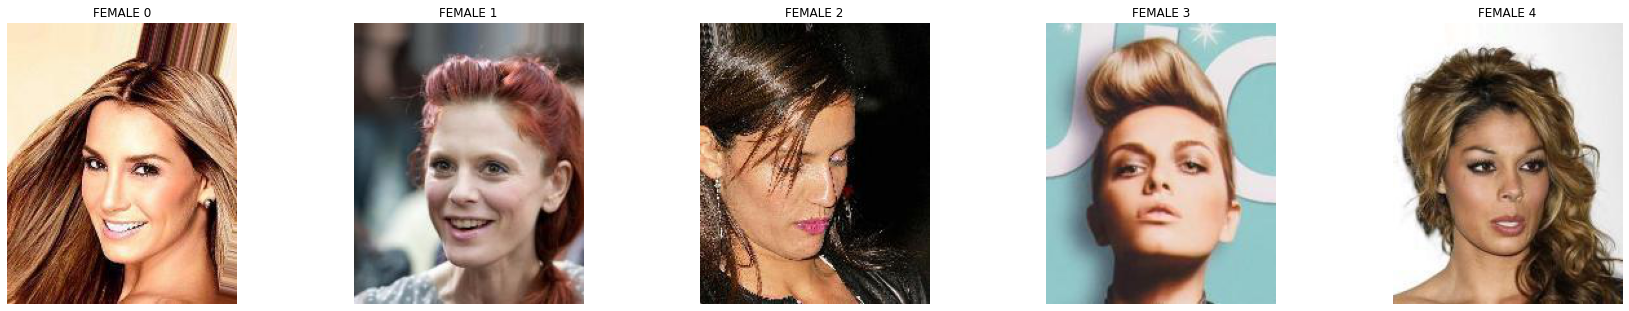

In [ ]:
count = 0
plt.figure(figsize=(30,30))
for image in female_train_images:
    ax=plt.subplot(5,5,count+1)
    plt.imshow(mpimg.imread('data/train/women/' + image))
    plt.title("FEMALE " + str(count))
    plt.axis('off')
    count = count + 1
    if count == 5:
      break

<h2> II- Define the model </h2>

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
num_classes = 2
epochs = 5

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory=pathlib.Path("/content/data/train/"), seed=123, image_size=(img_height, img_width), label_mode='categorical', batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(directory=pathlib.Path("/content/data/test/"), seed=123, image_size=(img_height, img_width), label_mode='categorical', batch_size=batch_size)
class_names = train_ds.class_names
class_names

Found 49999 files belonging to 2 classes.
Found 10001 files belonging to 2 classes.


['men', 'women']

In [ ]:
print(train_ds)

<BatchDataset shapes: ((None, 180, 180, 3), (None, 2)), types: (tf.float32, tf.float32)>


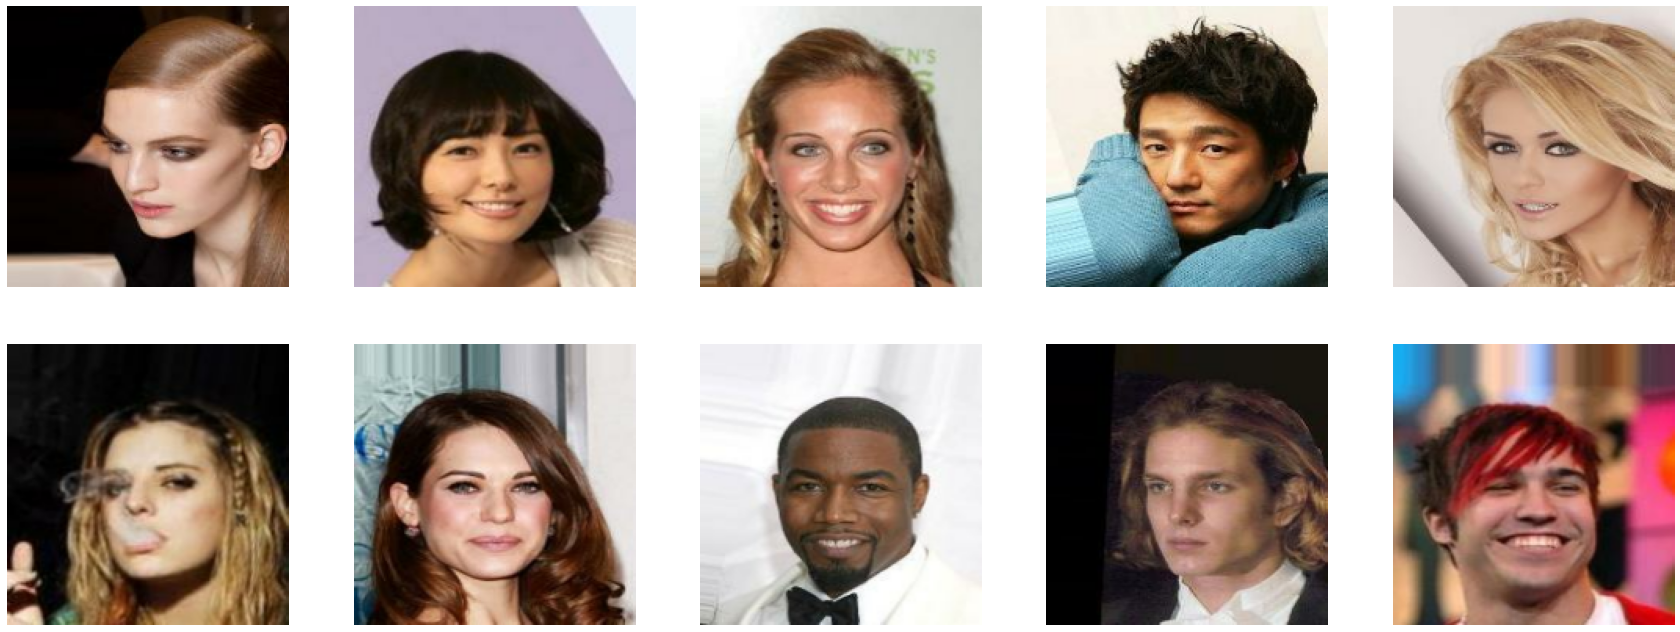

In [ ]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
start_time = time.time()
history = model.fit(train_ds, validation_data=test_ds, epochs=epochs, batch_size=batch_size)
end_time = time.time()
time_elapsed = (end_time - start_time)
print("Time elapsed " + str(time_elapsed))

Epoch 1/5
1563/1563 [==============================] - 275s 175ms/step - loss: 12.2210 - accuracy: 0.8552 - val_loss: 0.2536 - val_accuracy: 0.8958
Epoch 2/5
1563/1563 [==============================] - 273s 174ms/step - loss: 0.1884 - accuracy: 0.9234 - val_loss: 0.2010 - val_accuracy: 0.9227
Epoch 3/5
1563/1563 [==============================] - 272s 174ms/step - loss: 0.1213 - accuracy: 0.9523 - val_loss: 0.2628 - val_accuracy: 0.9133
Epoch 4/5
1563/1563 [==============================] - 273s 175ms/step - loss: 0.0873 - accuracy: 0.9652 - val_loss: 0.2465 - val_accuracy: 0.9285
Epoch 5/5
1563/1563 [==============================] - 273s 175ms/step - loss: 0.0637 - accuracy: 0.9761 - val_loss: 0.3183 - val_accuracy: 0.9243
Time elapsed 1512.670531988144


In [ ]:
_, accuracy = model.evaluate(test_ds)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 14s 43ms/step - loss: 0.3830 - accuracy: 0.8974
Accuracy: 89.74


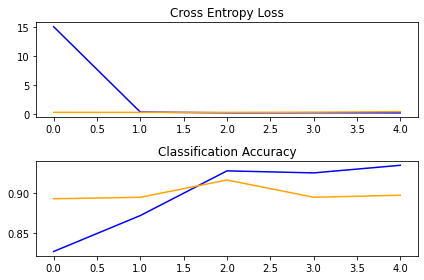

In [ ]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.tight_layout()
# save plot to file
filename = 'cifar'
pyplot.savefig(filename + '_plot.png')

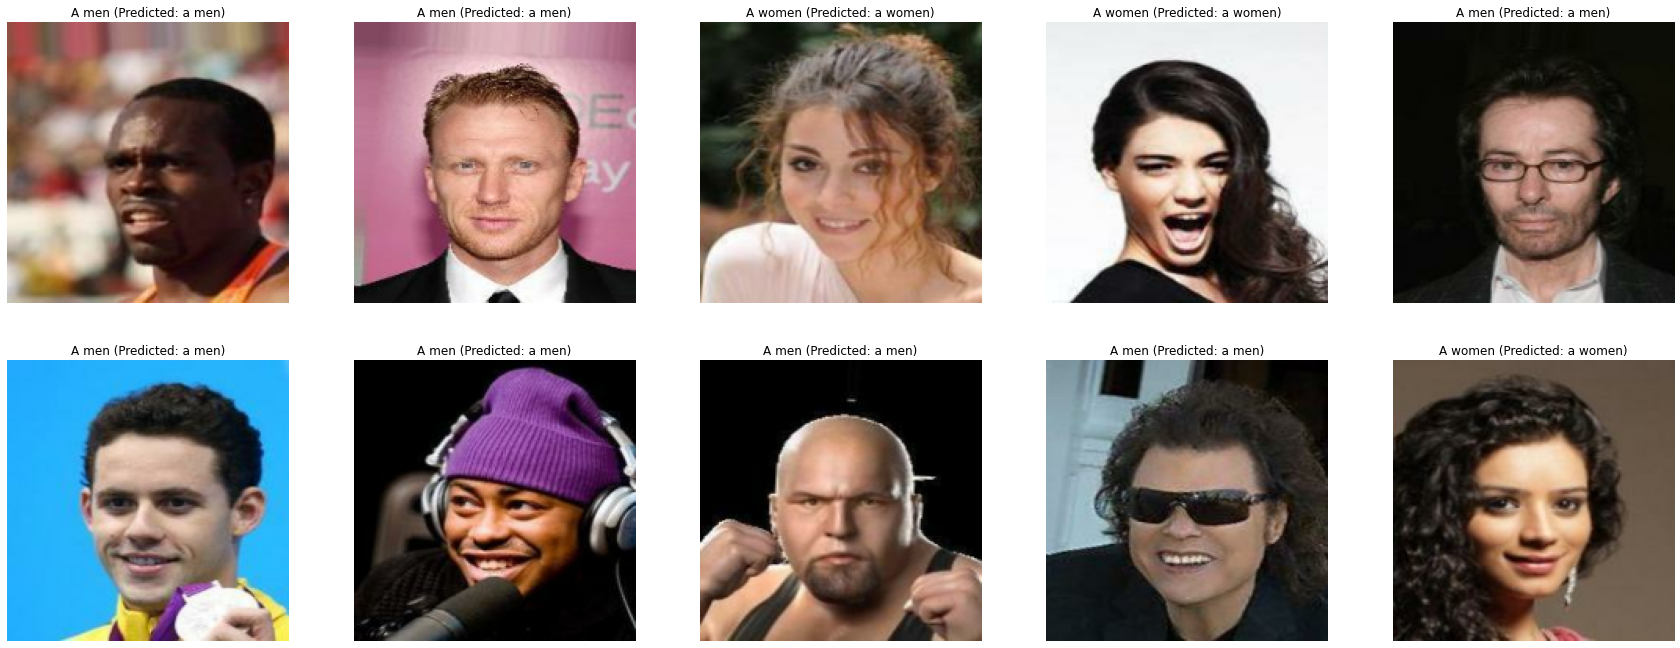

In [ ]:
plt.figure(figsize=(30, 30))
for images, labels in test_ds.take(1):
  for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    img_batch = np.expand_dims(images[i], axis=0)
    pred = model.predict(img_batch)
    pred = np.argmax(pred)
    plt.title("A " + str(class_names[np.argmax(labels[i])]) + " (Predicted: a " + str(class_names[pred]) + ")")
    plt.axis("off")

Predicted gender of Image 'hussein.jpeg': men


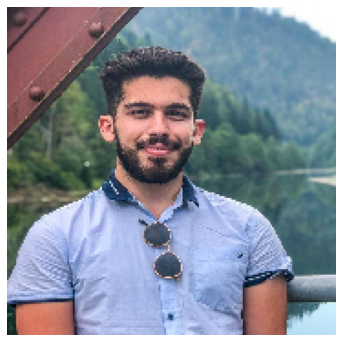

In [ ]:
image = tf.keras.preprocessing.image.load_img('hussein.jpeg', target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
img_tensor = tf.keras.backend.constant(image) 
img_batch = np.expand_dims(img_tensor, axis=0)
pred = model.predict(img_batch)
pred = np.argmax(pred)
plt.figure(figsize=(35, 35))
ax = plt.subplot(5, 5, 1)
plt.imshow(img_tensor.numpy().astype("uint8"))
plt.axis("off")
print("Predicted gender of Image 'hussein.jpeg': " + str(class_names[int(pred)]))

Predicted gender of Image 'carlita.jpeg': men


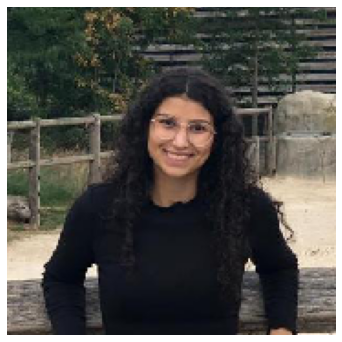

In [ ]:
image = tf.keras.preprocessing.image.load_img('carlita.jpeg', target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
img_tensor = tf.keras.backend.constant(image) 
img_batch = np.expand_dims(img_tensor, axis=0)
pred = model.predict(img_batch)
pred = np.argmax(pred)
plt.figure(figsize=(35, 35))
ax = plt.subplot(5, 5, 1)
plt.imshow(img_tensor.numpy().astype("uint8"))
plt.axis("off")
print("Predicted gender of Image 'carlita.jpeg': " + str(class_names[int(pred)]))